In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicLight') # For Windows
print(plt.rcParams['font.family'])
import json  
import cv2
import numpy as np

['NanumGothicLight']


In [2]:
def show_img(data, path, face):    
    img_array = np.fromfile(path, np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    # img = cv2.imread(path, cv2.IMREAD_COLOR)    
    drawing_image = img.copy()
    plt.imshow(cv2.cvtColor(drawing_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.savefig('../data/image_analysis/imagesave/'+face+'facepic.jpg', facecolor='#ffffff', bbox_inches='tight')
    plt.show()

In [10]:
def show_flow(emo, order, face):
    plt.rc('ytick', labelsize=17)  # y축 눈금 폰트 크기
    plt.rc('xtick', labelsize=17)  # x축 눈금 폰트 크기 
    plt.rc('legend', fontsize=17)  # 범례 폰트 크기
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(len(emotion[emo]), 1, figsize = (20,20))
    # plt.suptitle(face)
    for idx in range(len(emotion[emo])):
        target_list = [i['from'].replace('-',' - ') + " -> " + i['dest'].replace('-', ' - ') for i in emotion[emo][idx]['landmark_pair']]
        temp_plot = sns.lineplot(data = df[target_list], markers=False, dashes=False, ax=ax[idx], palette="tab10")        
        ax[idx].axvline(order, 0, 1, color='red', linestyle='--', linewidth=2)
        temp_plot.set_title(emotion[emo][idx]['name'], fontsize=30)
    plt.savefig('../data/image_analysis/imagesave/'+face+'.jpg', facecolor='#ffffff', bbox_inches='tight')
    plt.show()

In [ ]:
# def findNearNum(exList, values):
#     minValue = min(exList, key=lambda x:abs(x-values))
#     answer = minValue
#     return answer

# exList = [4, 15, 7, 32, 22]
# values = 18.241

# returnList = findNearNum(exList, values)

오른쪽


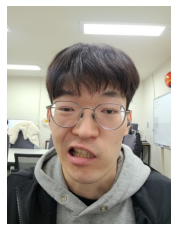

왼쪽


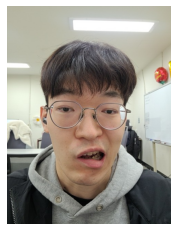

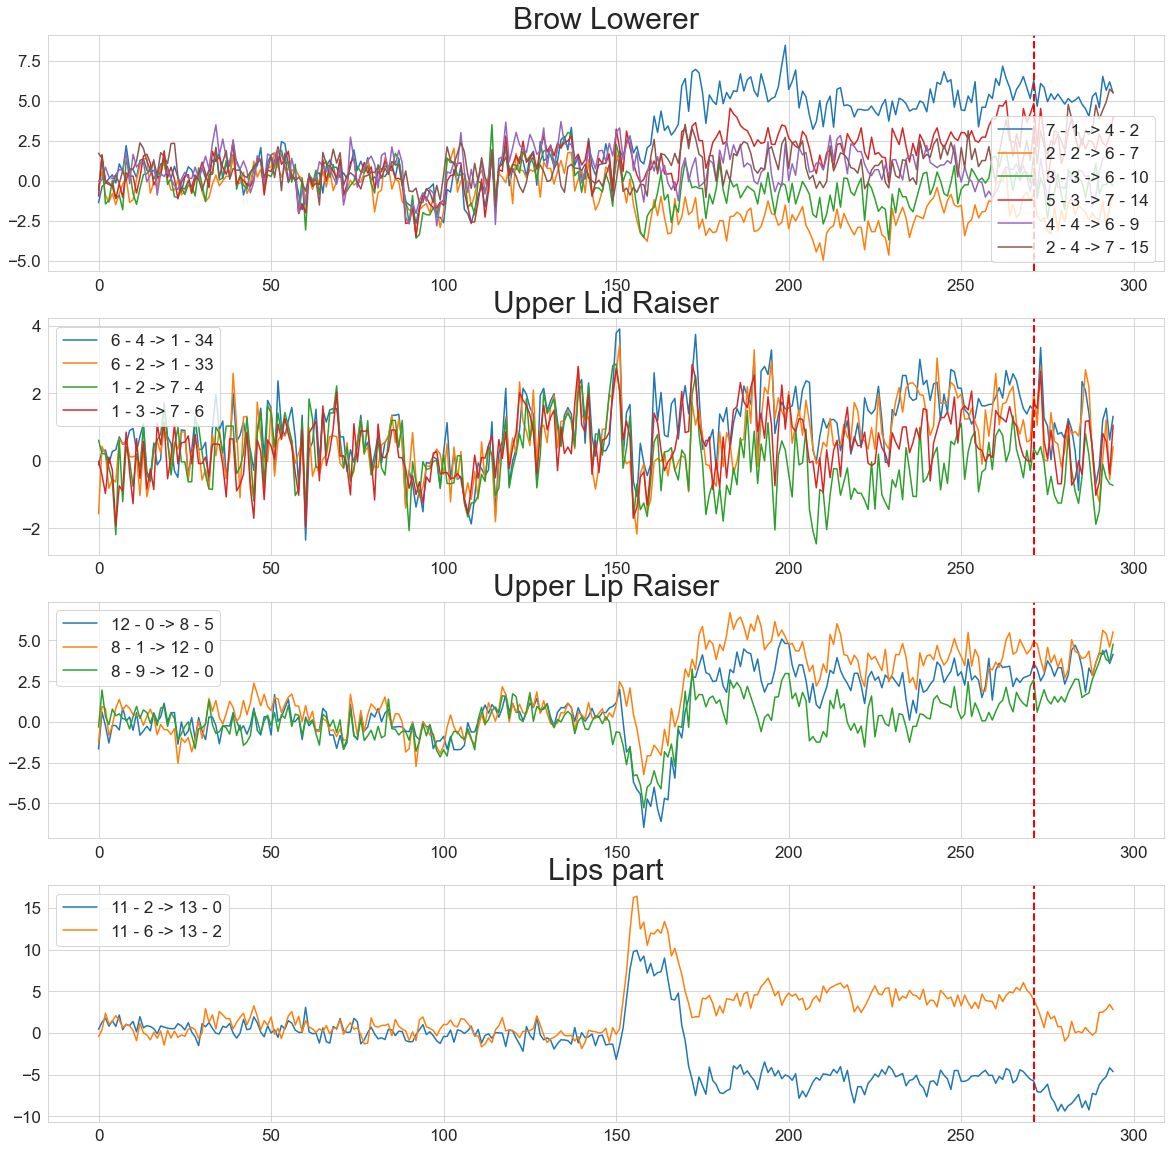

In [25]:
# Happy, Sadness, Surprise, Anger
emo = {'웃기':'Happy',
        '슬픔': 'Sadness',
        '놀람': 'Surprise',
        '화남': 'Anger'}
people_list = ['나오른쪽', '나왼쪽']
emo_kr = '화남'
image_order = 271

for fa in people_list:
    face = fa + emo_kr
    df = pd.read_csv('../data/image_analysis/'+face+'/'+face+'.csv')
    with open('../data/image_analysis/emotion_rule_weight.json', 'r') as f:
        emotion = json.load(f)
    if '오른쪽' in fa:
        right = df
        print("오른쪽")
        show_img(df, '../data/image_analysis/'+face+'/' + str(image_order) + '.jpg', face)
    elif '왼쪽' in fa:
        left = df
        print("왼쪽")
        show_img(df, '../data/image_analysis/'+face+'/' + str(image_order) + '.jpg', face)
    # print(pd.DataFrame(df.iloc[image_order]).to_dict()[image_order])

df = right - left
show_flow(emo[emo_kr], image_order, face)
